# Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
# import basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

#  There are 32560 rows and 15 columns present in the dataset

#  The target variable object dtye classifiation promblem

In [4]:
for i in df.columns:
    print(df[i].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int6

#  
The target varible is above 50 k income or not it means there is binary classification promblem and we  found data imbalance 

And we can see there is unique symbol ('?') present in the dataset and we considered this is null value
and we drop Education_num cause this is the number

In [5]:
df.drop(columns='Education_num',axis=1,inplace=True)

In [6]:
for column in df.columns:
    df[column] = df[column].replace(' ?', np.nan)

In [7]:
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

#  As we can see there is null value present in the dataset

In [8]:
missing_values =df[df['Occupation'].isna()]
missing_values

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,NaN,180211,Some-college,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,NaN,293936,7th-8th,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
68,25,NaN,200681,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,NaN,212759,10th,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
105,17,NaN,304873,10th,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,NaN,320084,Bachelors,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32530,30,NaN,33811,Bachelors,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,NaN,287372,Doctorate,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32540,41,NaN,202822,HS-grad,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [9]:
missing_values['Workclass'].nunique()

1

#  As we can see there is also Workclass column  null values  so better we drop this null values on Workclass columns and Occupation columns

In [10]:
df.dropna(axis=1, inplace=True)

In [11]:
df.isna().sum()

Age               0
Fnlwgt            0
Education         0
Marital_status    0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Income            0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Fnlwgt          32560 non-null  int64 
 2   Education       32560 non-null  object
 3   Marital_status  32560 non-null  object
 4   Relationship    32560 non-null  object
 5   Race            32560 non-null  object
 6   Sex             32560 non-null  object
 7   Capital_gain    32560 non-null  int64 
 8   Capital_loss    32560 non-null  int64 
 9   Hours_per_week  32560 non-null  int64 
 10  Income          32560 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.7+ MB


# All columns is Int and object dtype and features is object dtype it means binary classification promblem

In [13]:
df.describe()

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


# 
Age: The age of the individual. The dataset has a range from 17 to 90 years, with an average age of approximately 38.6 years. The standard deviation is around 13.6, indicating a moderate amount of variation in ages.

Fnlwgt: Final weight is a statistical term representing the number of people the census believes the entry represents. The specific interpretation of this attribute may depend on the context of the dataset, but it does not provide any meaningful statistical information in the given statistics.

Education_num: This attribute represents the number of years of education completed by each individual. The dataset has a range from 1 to 16 years, with an average education level of approximately 10.1 years. The standard deviation is around 2.6, indicating a moderate amount of variation in education levels.

Capital_gain: It represents the amount of capital gains received by each individual. The dataset has a wide range of values, from 0 to 99,999. The average capital gain is approximately 1,077.6, but the standard deviation is quite high at 7,385.4, suggesting that there is significant variability in the capital gains among individuals.

Capital_loss: This attribute represents the amount of capital losses incurred by each individual. The dataset has a range from 0 to 4,356. The average capital loss is approximately 87.3, with a standard deviation of 402.97. Similar to capital gain, there is significant variability in the capital losses among individuals.

Hours_per_week: It indicates the number of hours worked per week by each individual. The dataset has a range from 1 to 99 hours, with an average of approximately 40.4 hours. The standard deviation is around 12.3, suggesting a moderate amount of variability in the number of working hours.

#  EDA

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

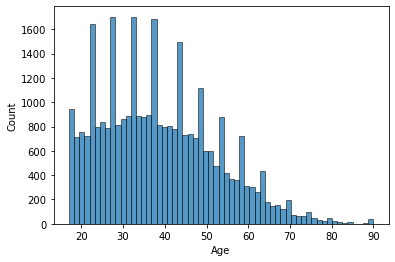

In [14]:
sns.histplot(x=df['Age'])
df['Age'].value_counts()

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

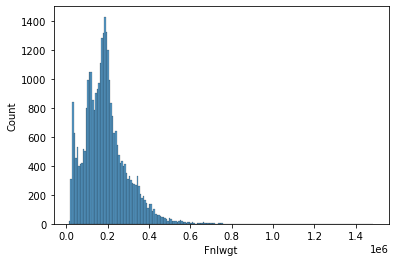

In [15]:
sns.histplot(x=df['Fnlwgt'])
df['Fnlwgt'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

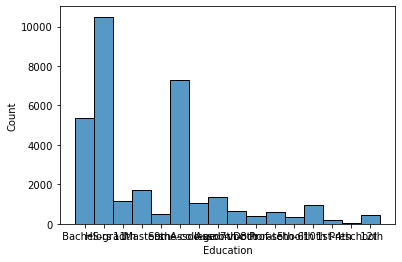

In [16]:
sns.histplot(x=df['Education'])
df['Education'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

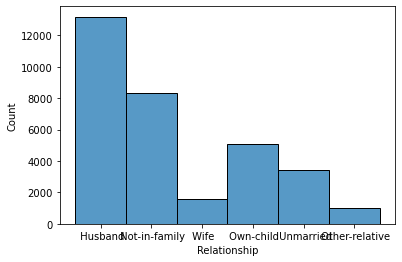

In [17]:
sns.histplot(x=df['Relationship'])
df['Relationship'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

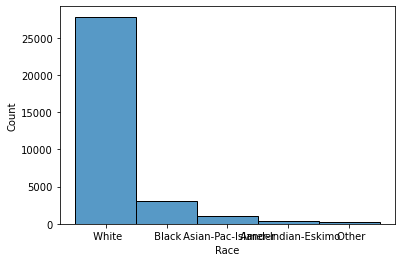

In [18]:
sns.histplot(x=df['Race'])
df['Race'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

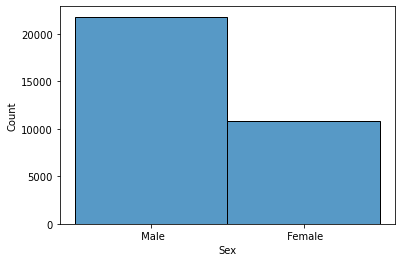

In [19]:
sns.histplot(x=df['Sex'])
df['Sex'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

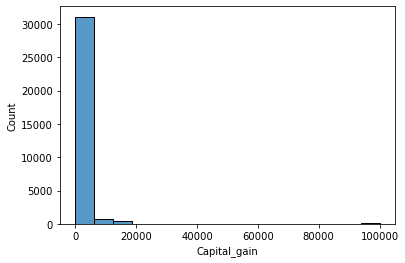

In [20]:
sns.histplot(x=df['Capital_gain'])
df['Capital_gain'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

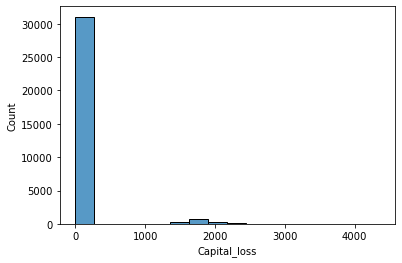

In [21]:
sns.histplot(x=df['Capital_loss'])
df['Capital_loss'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

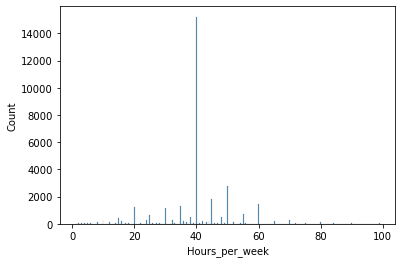

In [22]:
sns.histplot(x=df['Hours_per_week'])
df['Hours_per_week'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

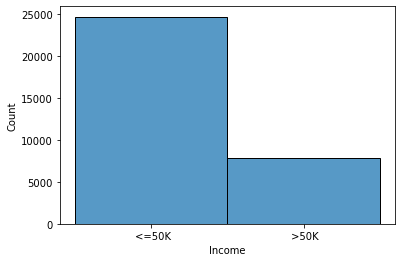

In [23]:
sns.histplot(x=df['Income'])
df['Income'].value_counts()

<AxesSubplot:xlabel='Income', ylabel='Age'>

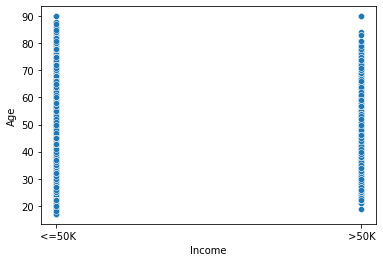

In [24]:
sns.scatterplot(data=df,y='Age',x="Income")

#  
Above the visiluation there is every age group is income is less than 50k and above 50k

<AxesSubplot:xlabel='Age', ylabel='Education'>

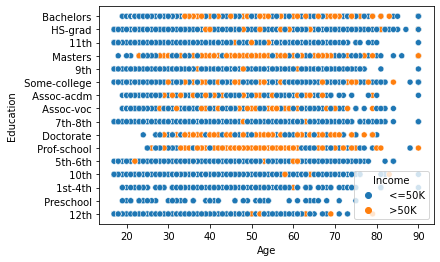

In [25]:
sns.scatterplot(data=df,y='Education',x="Age",hue='Income')

# 
we can see the visiluation the aboe age of 30 and education is bachelors, masters, doctorate, prof-school there is chances to income is greater than 50k

<AxesSubplot:xlabel='Age', ylabel='Marital_status'>

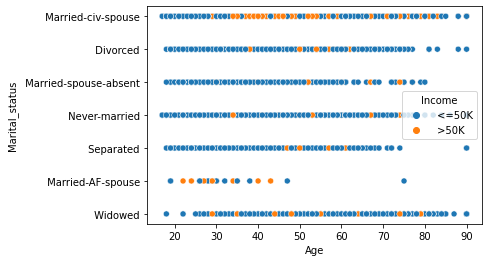

In [26]:
sns.scatterplot(data=df,y='Marital_status',x="Age",hue='Income')

# 
As we can see the  married status Married-civ-spouse,  Married-af-spouse is high chances to income is greater than 50k

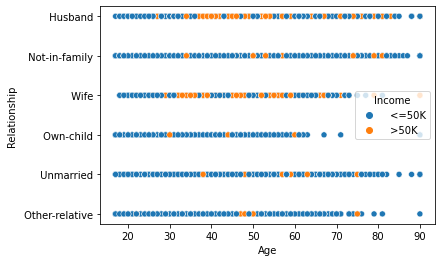

In [27]:
sns.scatterplot(data=df,y='Relationship',x="Age",hue='Income')
plt.show()

# 
As we can see husband and wife relation status there is high chances of income is greater than 50

<AxesSubplot:xlabel='Age', ylabel='Race'>

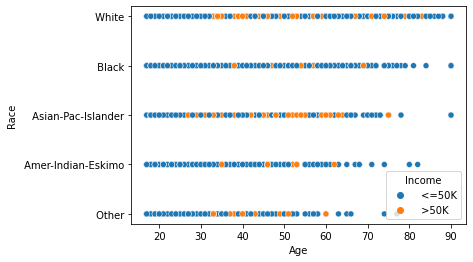

In [28]:
sns.scatterplot(data=df,y='Race',x="Age",hue='Income')

# 
As we can see the white and asican-pac-islander there is high chances of income is greater than 50k

<AxesSubplot:xlabel='Sex', ylabel='Age'>

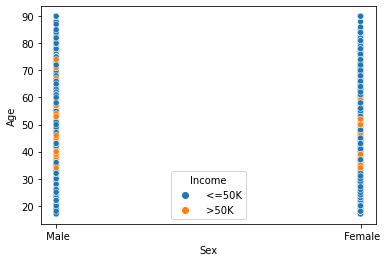

In [29]:
sns.scatterplot(data=df,y='Age',x="Sex",hue='Income')

# 
As we can see the age of 30 to 55 age group male or female is income is more than 50k

<AxesSubplot:xlabel='Relationship', ylabel='Capital_gain'>

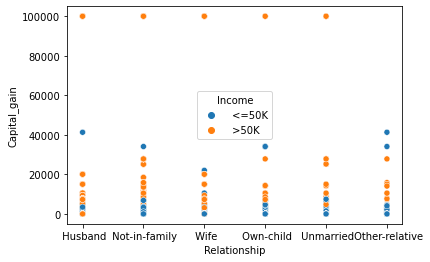

In [30]:
sns.scatterplot(data=df,y='Capital_gain',x="Relationship",hue='Income')

# 
As we can see there is any relationship capital gain contributing income is more than 50k

<AxesSubplot:xlabel='Race', ylabel='Capital_gain'>

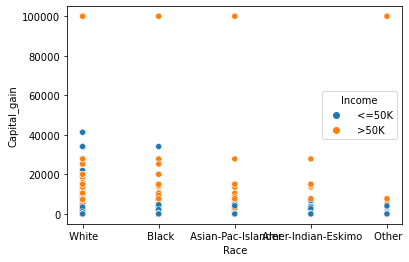

In [31]:
sns.scatterplot(data=df,y='Capital_gain',x="Race",hue='Income')

# 
As we can see there is any race status and capital gain contribution income more than 50k

<AxesSubplot:xlabel='Race', ylabel='Capital_loss'>

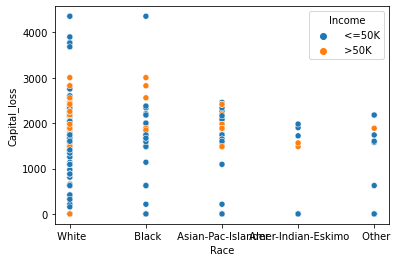

In [32]:
sns.scatterplot(data=df,y='Capital_loss',x="Race",hue='Income')

# 
As we can see capital loss in white race status there is high chances to income 50k

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

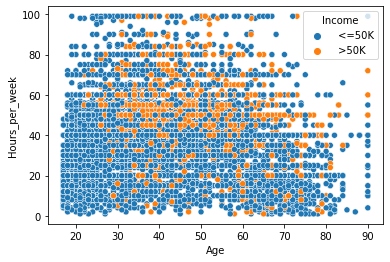

In [33]:
sns.scatterplot(data=df,y='Hours_per_week',x="Age",hue='Income')

# 
As we can see the age group above 30 and above 40hrs pre week there is high chances to income 50k

<AxesSubplot:xlabel='Hours_per_week', ylabel='Education'>

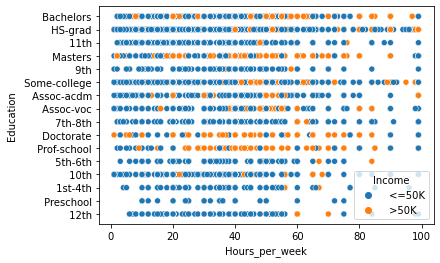

In [34]:
sns.scatterplot(data=df,y='Education',x="Hours_per_week",hue='Income')

#  
As we can see there is high educatation is above 20 hours per week is hig chances to income 50k 

<AxesSubplot:>

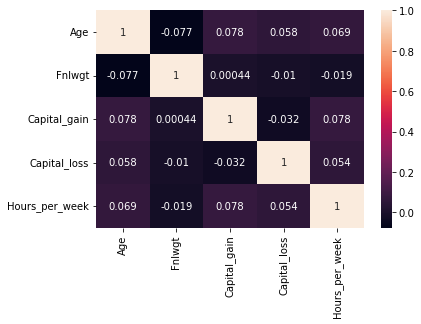

In [35]:
sns.heatmap(df.corr(),annot=True)

# 
There is no co-relation in the dataset

In [36]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !='object':
        numerical_col.append(i)

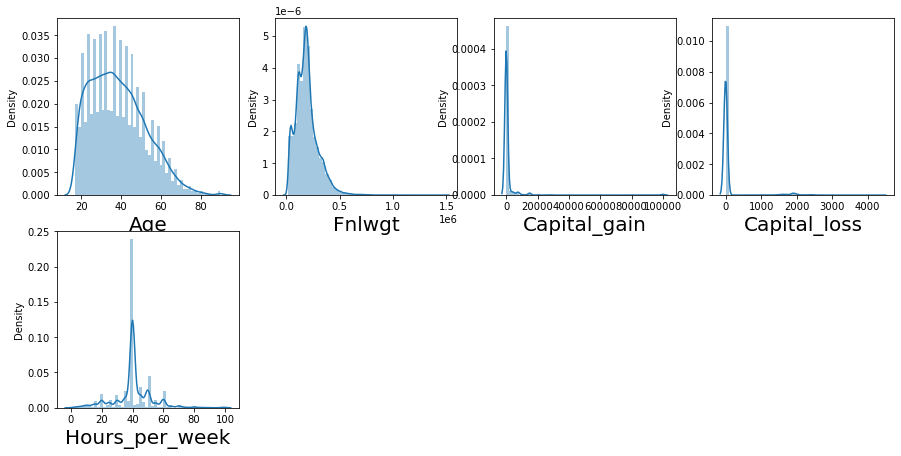

In [37]:
 plt.figure(figsize=(15,15))
plotnumber =1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

# As we can see theere is right skewed present in the dataset

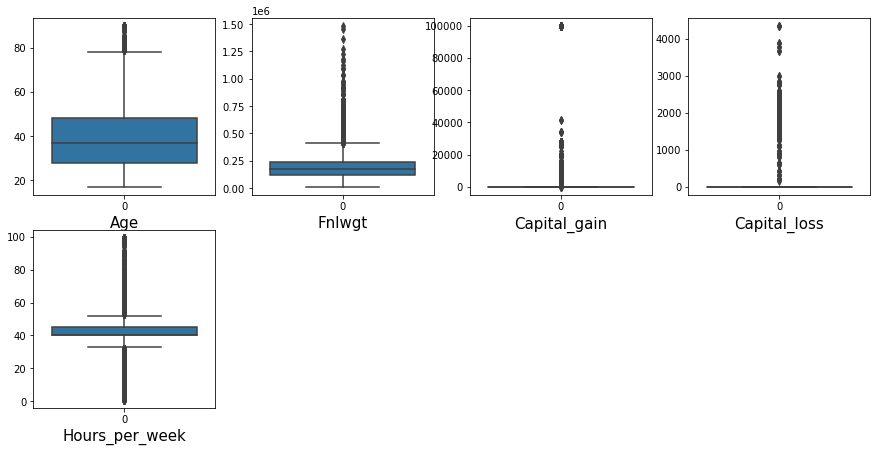

In [38]:
plt.figure(figsize=(15,15))
i=1
for column in numerical_col:
    if i<=12:
        
        
    
        plt.subplot(4,4,i)
    
        ax=sns.boxplot(data=df[column])
    
        plt.xlabel (column,fontsize=15)
        
    i+=1
    
plt.show()
    
                
                


#  
Above the boxplot we can see outliers present in the dataset we have to remove 

#  encoding process

In [39]:
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
for i in catgorical_col:
    df[i] = lm.fit_transform(df[i])
df.head()

,Age,Fnlwgt,Education,Marital_status,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,83311,9,2,0,4,1,0,0,13,0
1,38,215646,11,0,1,4,1,0,0,40,0
2,53,234721,1,2,0,2,1,0,0,40,0
3,28,338409,9,2,5,2,0,0,0,40,0
4,37,284582,12,2,5,4,0,0,0,40,0


In [40]:
x=df.drop(columns='Income')
y=df['Income']

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(32560, 10)

In [42]:
threshold=3
print(np.where(z>threshold))

(array([    9,    10,    13, ..., 32532, 32550, 32552], dtype=int64), array([9, 5, 5, ..., 5, 5, 5], dtype=int64))


In [43]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(32560, 11)
(28776, 11)


#  Percent of data loss

In [44]:
loss_percent = (32560-28590)/32560*100
loss_percent

12.192874692874692

#  Using z score techniques we loss huge data we use yeo-johnson techniques to remove outliers

In [45]:
from sklearn.preprocessing import PowerTransformer

In [46]:
pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(x)

In [47]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education         -0.934063
Marital_status    -0.013448
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

#  
As we can see there is a skewness present in the dataset we have to reduced it

In [48]:
columns=df[['Fnlwgt','Relationship','Capital_gain','Capital_loss']]
for column in columns:
    df[column]=np.cbrt(df[column])

In [49]:
df.skew()

Age               0.558738
Fnlwgt           -0.164177
Education        -0.934063
Marital_status   -0.013448
Relationship     -0.102451
Race             -2.435332
Sex              -0.719244
Capital_gain      4.100150
Capital_loss      4.336999
Hours_per_week    0.227636
Income            1.212383
dtype: float64

# handling data imbalance

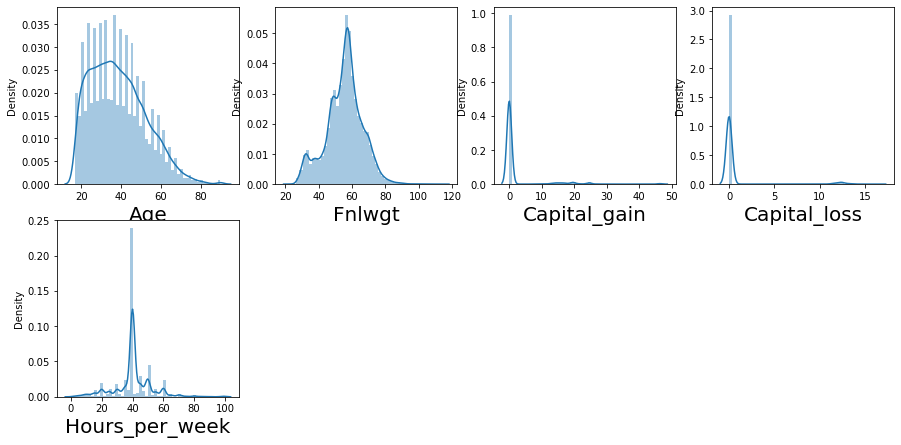

In [50]:
 plt.figure(figsize=(15,15))
plotnumber =1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [51]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

,vif,features
0,1.162781,Age
1,1.007916,Fnlwgt
2,1.006122,Education
3,1.134647,Marital_status
4,1.738388,Relationship
5,1.013519,Race
6,1.555745,Sex
7,1.021036,Capital_gain
8,1.013743,Capital_loss
9,1.133104,Hours_per_week


#  Preprocessing done now we can build a model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rnd = RandomForestClassifier()
    rnd.fit(x_train, y_train)
    y_pred = rnd.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.8797195253505933 at random_state 102


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRs)

In [56]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report ,confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [57]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR= LR.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predLR)))
print('\n')
print(confusion_matrix(y_test, predLR))

Accuracy score 0.614819309600863


[[5191 2325]
 [3388 3928]]


In [58]:
Rnd= RandomForestClassifier()
Rnd.fit(x_train, y_train)
predRnd= Rnd.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predRnd)))
print('\n')
print(confusion_matrix(y_test, predRnd))

Accuracy score 0.8788430420711975


[[6625  891]
 [ 906 6410]]


In [59]:
Etr= ExtraTreesClassifier()
Etr.fit(x_train, y_train)
predEtr= Etr.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predEtr)))
print('\n')
print(confusion_matrix(y_test, predEtr))

Accuracy score 0.8700782092772384


[[6546  970]
 [ 957 6359]]


In [60]:
svc=SVC()
svc.fit(x_train, y_train)
predsvc=svc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predsvc)))
print('\n')

print(confusion_matrix(y_test, predsvc))

Accuracy score 0.5980987055016181


[[7434   82]
 [5879 1437]]


In [61]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predgbc =gbc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predgbc)))
print('\n')

print(confusion_matrix(y_test, predgbc))

Accuracy score 0.8702130528586839


[[6332 1184]
 [ 741 6575]]


In [62]:
adaboost= AdaBoostClassifier()
adaboost.fit(x_train, y_train)
predadaboost =adaboost.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predadaboost)))
print('\n')

print(confusion_matrix(y_test, predadaboost))

Accuracy score 0.8557847896440129


[[6227 1289]
 [ 850 6466]]


In [63]:
bagging=BaggingClassifier()
bagging.fit(x_train, y_train)
predbagging =bagging.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predbagging)))
print('\n')

print(confusion_matrix(y_test, predbagging))

Accuracy score 0.8718311758360302


[[6639  877]
 [1024 6292]]


# Cross Validation Score

In [64]:
print('LogisticRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predLR)- score.mean())

LogisticRegression 


[0.61640372 0.62135922 0.61741505 0.60716092 0.6181855 ]
0.6161048816022348
Difference between Accuracy score  and cross validation score is -  -0.0012855720013718042


In [65]:
print('ExtraTreesClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

ExtraTreesClassifier 


[0.77791262 0.84051375 0.90786812 0.90725195 0.90907252]
0.8685237929706002
Difference between Accuracy score  and cross validation score is -  0.010319249100597228


In [66]:
print('GradientBoostingClassifier ')
print('\n')
score=cross_val_score(gbc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predgbc)- score.mean())

GradientBoostingClassifier 


[0.7868123  0.84142395 0.88723706 0.87963993 0.88843936]
0.8567105194032371
Difference between Accuracy score  and cross validation score is -  0.01350253345544683


In [67]:
print('AdaBoostClassifier ')
print('\n')
score=cross_val_score(adaboost, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predadaboost)- score.mean())

AdaBoostClassifier 


[0.78448625 0.82959142 0.87449434 0.86527764 0.87134621]
0.8450391711943668
Difference between Accuracy score  and cross validation score is -  0.010745618449646166


In [68]:
print('BaggingClassifier ')
print('\n')
score=cross_val_score(bagging, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predbagging)- score.mean())

BaggingClassifier 


[0.76193366 0.8329288  0.90008091 0.90047537 0.89996966]
0.8590776789043048
Difference between Accuracy score  and cross validation score is -  0.01275349693172545


In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
parameters ={'criterion': ['gini','entropy'],
            'random_state': [10,100,850],
            'n_estimators':[50,100,200,300]}



In [71]:
GCV =GridSearchCV(RandomForestClassifier(),parameters, cv=3)

In [72]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [10, 100, 850]})

In [73]:
GCV.best_params_

{'criterion': 'gini', 'n_estimators': 100, 'random_state': 10}

In [75]:
Final_model = RandomForestClassifier(criterion='gini',n_estimators=100,random_state=10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)

87.90453074433657


In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score


In [77]:
print(classification_report(y_test,y_pred))   # support means sample to x_test 

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      7516
           1       0.49      0.49      0.49      7316

    accuracy                           0.49     14832
   macro avg       0.49      0.49      0.49     14832
weighted avg       0.49      0.49      0.49     14832



In [78]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [79]:
print('threshold',threshold)
print('False possitive rate',fpr)
print('True possitive rate',tpr)

threshold [2 1 0]
False possitive rate [0.         0.50319319 1.        ]
True possitive rate [0.         0.49084199 1.        ]


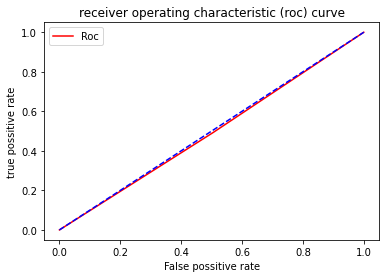

In [80]:
plt.plot(fpr,tpr, color='red', label='Roc')
plt.plot([0,1],[0,1], color='blue', linestyle='--')
plt.xlabel('False possitive rate')
plt.ylabel('true possitive rate')
plt.title('receiver operating characteristic (roc) curve')
plt.legend()
plt.show()

In [81]:
# how  much area auc curve covered
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.4938244011463352